In [1]:
!pip install Sastrawi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_scraping.csv')
df.head()

,content,score
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",5
1,Wow impression aku pas pakai produk Npure tone...,5
2,Jadi aq beli toner ini krn muka aku lagi brunt...,5
3,"baru pertama kali pakai grgr kemakan iklan, ta...",5
4,best purchase cica toner yg ada daun cica asli...,5


In [3]:
#Pilih Kolom Content Saja
df_data = df[['content']]
df_data

,content
0,"Untuk ukuran toner/FTE, produk ini patut diacu..."
1,Wow impression aku pas pakai produk Npure tone...
2,Jadi aq beli toner ini krn muka aku lagi brunt...
3,"baru pertama kali pakai grgr kemakan iklan, ta..."
4,best purchase cica toner yg ada daun cica asli...
...,...
1013,Cukup melembabkan & refreshing. Efek plus lain...
1014,buat meredakan kemerahan ini lumayan sih. aku ...
1015,"Bagi yg punya masalh wajah, kaya bruntusan, po..."
1016,Awalnya lagi nyari produk skincare dengan kand...


In [4]:
# TAHAP CLEANING TEXT

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Menghapus semua simbol
    emoji_pattern = re.compile("["
                         u"\U0001F600-\U0001F64F"  # emoticons
                         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                         u"\U0001F700-\U0001F77F"  # alchemical symbols
                         u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                         u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                         u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                         u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                         u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                         u"\U0001F004-\U0001F0CF"  # Additional emoticons
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text

    return text

In [5]:
#Proses Pengaplikasian Fungsi Cleaning Text

df_data['content_clean'] = df_data['content'].apply(cleaningText)
df_data.head(5)

,content,content_clean
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",Untuk ukuran tonerFTE produk ini patut diacung...
1,Wow impression aku pas pakai produk Npure tone...,Wow impression aku pas pakai produk Npure tone...
2,Jadi aq beli toner ini krn muka aku lagi brunt...,Jadi aq beli toner ini krn muka aku lagi brunt...
3,"baru pertama kali pakai grgr kemakan iklan, ta...",baru pertama kali pakai grgr kemakan iklan tap...
4,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...


In [6]:
# TAHAP CASE FOLDING (merubah teks menjadi huruf kecil)
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

In [7]:
#Proses Pengaplikasian Fungsi Case Folding

df_data['case_folding'] = df_data['content_clean'].apply(casefoldingText)
df_data.head()

,content,content_clean,case_folding
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",Untuk ukuran tonerFTE produk ini patut diacung...,untuk ukuran tonerfte produk ini patut diacung...
1,Wow impression aku pas pakai produk Npure tone...,Wow impression aku pas pakai produk Npure tone...,wow impression aku pas pakai produk npure tone...
2,Jadi aq beli toner ini krn muka aku lagi brunt...,Jadi aq beli toner ini krn muka aku lagi brunt...,jadi aq beli toner ini krn muka aku lagi brunt...
3,"baru pertama kali pakai grgr kemakan iklan, ta...",baru pertama kali pakai grgr kemakan iklan tap...,baru pertama kali pakai grgr kemakan iklan tap...
4,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...


In [8]:
import nltk
nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# TAHAP TOKENIZING

from nltk.tokenize import word_tokenize

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

#Proses Pengaplikasian Fungsi Tokenizing

df_data['content_toknenizing'] = df_data['case_folding'].apply(tokenizingText)
df_data.head()

,content,content_clean,case_folding,content_toknenizing
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",Untuk ukuran tonerFTE produk ini patut diacung...,untuk ukuran tonerfte produk ini patut diacung...,"[untuk, ukuran, tonerfte, produk, ini, patut, ..."
1,Wow impression aku pas pakai produk Npure tone...,Wow impression aku pas pakai produk Npure tone...,wow impression aku pas pakai produk npure tone...,"[wow, impression, aku, pas, pakai, produk, npu..."
2,Jadi aq beli toner ini krn muka aku lagi brunt...,Jadi aq beli toner ini krn muka aku lagi brunt...,jadi aq beli toner ini krn muka aku lagi brunt...,"[jadi, aq, beli, toner, ini, krn, muka, aku, l..."
3,"baru pertama kali pakai grgr kemakan iklan, ta...",baru pertama kali pakai grgr kemakan iklan tap...,baru pertama kali pakai grgr kemakan iklan tap...,"[baru, pertama, kali, pakai, grgr, kemakan, ik..."
4,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,"[best, purchase, cica, toner, yg, ada, daun, c..."


In [10]:
normalisasi_text = pd.read_csv('normalisasi.csv', encoding='latin1')

normalisasi_text_dict = {}
for index, row in normalisasi_text.iterrows():
    if row[0] not in normalisasi_text_dict:
        normalisasi_text_dict[row[0]] = row[1]

def normalisasi_term(document):
    return [normalisasi_text_dict[term] if term in normalisasi_text_dict else term for term in document]

df_data['content_normalisasi'] = df_data['content_toknenizing'].apply(normalisasi_term)
df_data.head()

,content,content_clean,case_folding,content_toknenizing,content_normalisasi
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",Untuk ukuran tonerFTE produk ini patut diacung...,untuk ukuran tonerfte produk ini patut diacung...,"[untuk, ukuran, tonerfte, produk, ini, patut, ...","[untuk, ukuran, tonerfte, produk, ini, patut, ..."
1,Wow impression aku pas pakai produk Npure tone...,Wow impression aku pas pakai produk Npure tone...,wow impression aku pas pakai produk npure tone...,"[wow, impression, aku, pas, pakai, produk, npu...","[wow, impression, saya, pas, pakai, produk, np..."
2,Jadi aq beli toner ini krn muka aku lagi brunt...,Jadi aq beli toner ini krn muka aku lagi brunt...,jadi aq beli toner ini krn muka aku lagi brunt...,"[jadi, aq, beli, toner, ini, krn, muka, aku, l...","[jadi, saya, beli, toner, ini, karena, muka, s..."
3,"baru pertama kali pakai grgr kemakan iklan, ta...",baru pertama kali pakai grgr kemakan iklan tap...,baru pertama kali pakai grgr kemakan iklan tap...,"[baru, pertama, kali, pakai, grgr, kemakan, ik...","[baru, pertama, kali, pakai, grgr, kemakan, ik..."
4,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,"[best, purchase, cica, toner, yg, ada, daun, c...","[best, purchase, cica, toner, yang, ada, daun,..."


In [11]:
# TAHAP FILTERING (STOPWORD / menghapus kata yang tidak penting)

def filteringText(text): # Remove stopwords in a text
    listStopwords = StopWordRemoverFactory().get_stop_words()
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

#Proses Pengaplikasian Fungsi Filtering

df_data['content_stopword'] = df_data['content_normalisasi'].apply(filteringText)
df_data.head()


,content,content_clean,case_folding,content_toknenizing,content_normalisasi,content_stopword
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",Untuk ukuran tonerFTE produk ini patut diacung...,untuk ukuran tonerfte produk ini patut diacung...,"[untuk, ukuran, tonerfte, produk, ini, patut, ...","[untuk, ukuran, tonerfte, produk, ini, patut, ...","[ukuran, tonerfte, produk, patut, diacungi, je..."
1,Wow impression aku pas pakai produk Npure tone...,Wow impression aku pas pakai produk Npure tone...,wow impression aku pas pakai produk npure tone...,"[wow, impression, aku, pas, pakai, produk, npu...","[wow, impression, saya, pas, pakai, produk, np...","[wow, impression, pas, pakai, produk, npure, t..."
2,Jadi aq beli toner ini krn muka aku lagi brunt...,Jadi aq beli toner ini krn muka aku lagi brunt...,jadi aq beli toner ini krn muka aku lagi brunt...,"[jadi, aq, beli, toner, ini, krn, muka, aku, l...","[jadi, saya, beli, toner, ini, karena, muka, s...","[jadi, beli, toner, muka, bruntusan, jadinya, ..."
3,"baru pertama kali pakai grgr kemakan iklan, ta...",baru pertama kali pakai grgr kemakan iklan tap...,baru pertama kali pakai grgr kemakan iklan tap...,"[baru, pertama, kali, pakai, grgr, kemakan, ik...","[baru, pertama, kali, pakai, grgr, kemakan, ik...","[baru, pertama, kali, pakai, grgr, kemakan, ik..."
4,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,"[best, purchase, cica, toner, yg, ada, daun, c...","[best, purchase, cica, toner, yang, ada, daun,...","[best, purchase, cica, toner, daun, cica, asli..."


In [13]:
# TAHAP STEMMING (pembentukan kata dasar)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

#Proses Pengaplikasian Fungsi Stemming

df_data['content_preprocessing'] = df_data['content_stopword'].apply(stemmingText)
df_data.drop_duplicates(subset = 'content_clean', inplace = True)
df_data.head()

,content,content_clean,case_folding,content_toknenizing,content_normalisasi,content_stopword,content_preprocessing
0,"Untuk ukuran toner/FTE, produk ini patut diacu...",Untuk ukuran tonerFTE produk ini patut diacung...,untuk ukuran tonerfte produk ini patut diacung...,"[untuk, ukuran, tonerfte, produk, ini, patut, ...","[untuk, ukuran, tonerfte, produk, ini, patut, ...","[ukuran, tonerfte, produk, patut, diacungi, je...","[ukur, tonerfte, produk, patut, acung, jempol,..."
1,Wow impression aku pas pakai produk Npure tone...,Wow impression aku pas pakai produk Npure tone...,wow impression aku pas pakai produk npure tone...,"[wow, impression, aku, pas, pakai, produk, npu...","[wow, impression, saya, pas, pakai, produk, np...","[wow, impression, pas, pakai, produk, npure, t...","[wow, impression, pas, pakai, produk, npure, t..."
2,Jadi aq beli toner ini krn muka aku lagi brunt...,Jadi aq beli toner ini krn muka aku lagi brunt...,jadi aq beli toner ini krn muka aku lagi brunt...,"[jadi, aq, beli, toner, ini, krn, muka, aku, l...","[jadi, saya, beli, toner, ini, karena, muka, s...","[jadi, beli, toner, muka, bruntusan, jadinya, ...","[jadi, beli, toner, muka, bruntusan, jadi, kas..."
3,"baru pertama kali pakai grgr kemakan iklan, ta...",baru pertama kali pakai grgr kemakan iklan tap...,baru pertama kali pakai grgr kemakan iklan tap...,"[baru, pertama, kali, pakai, grgr, kemakan, ik...","[baru, pertama, kali, pakai, grgr, kemakan, ik...","[baru, pertama, kali, pakai, grgr, kemakan, ik...","[baru, pertama, kali, pakai, grgr, makan, ikla..."
4,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,best purchase cica toner yg ada daun cica asli...,"[best, purchase, cica, toner, yg, ada, daun, c...","[best, purchase, cica, toner, yang, ada, daun,...","[best, purchase, cica, toner, daun, cica, asli...","[best, purchase, cica, toner, daun, cica, asli..."


In [14]:
df_data.to_csv('data_cleaned.csv', index=False)

In [15]:
import csv

lexicon_positive = dict()
with open('positive.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if "word" not in row and "weight" not in row:
            lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('negative.tsv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if "word" not in row and "weight" not in row:
            lexicon_negative[row[0]] = int(row[1])

def analisis_sentimen(text):
    word_scores = {}
    score= 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
            word_scores[word] = lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
            word_scores[word] =lexicon_negative[word]
        if (word in lexicon_negative) and (word in lexicon_positive):
            word_scores[word] = lexicon_negative[word] + lexicon_positive[word]

    polarity=''
    if (score >= 0):
        polarity = 'positive'
    else:
        polarity = 'negative'


    return word_scores, score, polarity


In [16]:
#Implementasi Fungsi Analisis Sentimen dan Merapihkan DataFrame Setelah Analisis Sentimen
results = df_data['content_preprocessing'].apply(analisis_sentimen)
results = list(zip(*results))
# Menambahkan kolom baru ke DataFrame
df_data['score_term'] = results[0]
df_data['polarity_score'] = results[1]
df_data['sentiment'] = results[2]
print(df_data['sentiment'].value_counts())
df_data=df_data[['content','score_term','polarity_score','sentiment']]
df_data.to_csv(r'inset_lexicon.csv', index = False, header = True,index_label=None)

sentiment
negative    611
positive    392
Name: count, dtype: int64


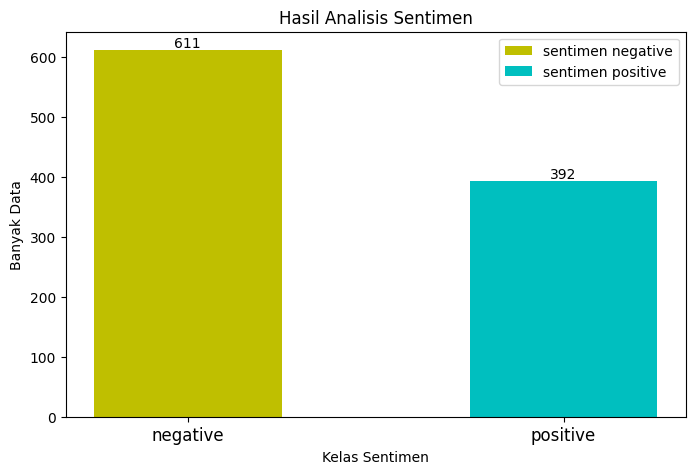

In [17]:
#Visualisasi Dalam Bentuk Diagram Batang

import matplotlib.pyplot as plt

sentimen = ["negative", "positive"]
banyakdata = [611, 392]
y = [611, 392]
y1 = [611, 392]
c = ['y', 'c']
x = np.arange(len(sentimen))
width = 0.5

fig, ax = plt.subplots(figsize=(8, 5))
y = ax.bar(x , y, width, label='sentimen negative', color='y')
y1 = ax.bar(x , y1, width, label='sentimen positive', color='c')

plt.bar(sentimen, banyakdata, width=0.5, color=c)
for i in range(len(sentimen)):
    plt.text(i, banyakdata[i], banyakdata[i], ha="center", va="bottom")

plt.xlabel("Kelas Sentimen")
plt.ylabel("Banyak Data")
ax.set_xticks(x)
ax.set_xticklabels(sentimen, size=12)
plt.legend()
plt.title("Hasil Analisis Sentimen")
plt.show()

In [18]:
#Menunjukkan hasil dalam bentuk presentase

hasil = df_data['sentiment'].value_counts(normalize=True)*100
hasil

sentiment
negative    60.917248
positive    39.082752
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Proporsi Label')

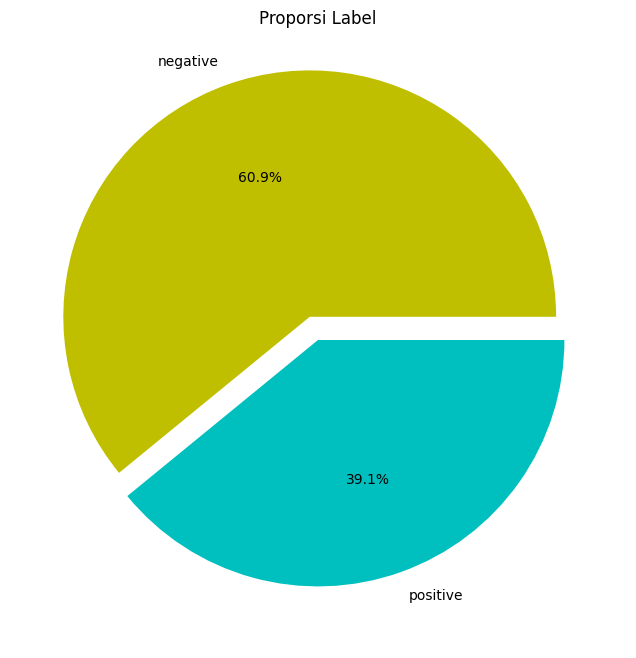

In [19]:
plt.figure(figsize=(8,8))
color=['y', 'c']
exp=[0.1,0]
plt.pie(df_data['sentiment'].value_counts(), labels=df_data['sentiment'].value_counts().index, autopct= '%1.1f%%', explode=exp, colors=color);
plt.title('Proporsi Label')

In [20]:
#Cek Hasil Analisis Sentimen dengan Lexicon

df_data.head()


,content,score_term,polarity_score,sentiment
0,"Untuk ukuran toner/FTE, produk ini patut diacu...","{'ukur': 3, 'produk': 3, 'patut': -3, 'jempol'...",-6,negative
1,Wow impression aku pas pakai produk Npure tone...,"{'pas': 3, 'produk': 3, 'mulut': -1, 'beneran'...",6,positive
2,Jadi aq beli toner ini krn muka aku lagi brunt...,"{'jadi': -1, 'beli': -1, 'merah': 1, 'pas': 3,...",2,positive
3,"baru pertama kali pakai grgr kemakan iklan, ta...","{'makan': 0, 'nyata': 2, 'lumayan': -1, 'cocok...",-4,negative
4,best purchase cica toner yg ada daun cica asli...,"{'asli': 2, 'dalam': 3, 'sering': 3, 'banget':...",23,positive
